# Chapter 5. 지도학습: 회귀 - 배포용

지도학습 : 회귀, 분류
  - 회귀(regression) : input -> continuous value  --> this chapter
  - 분류(classification) : input -> discrete value (class,label,category)  -->b chapter 6

회귀는 연속형 자료 
분류는 이산형 자료를 다룬다

## 5.1 1차원 입력 직선 모델

training data: 나이 $\textbf{x}$와 키 $\textbf{t}$의 column data
![대체 텍스트](식5-1.JPG)
- $x_n$ - 입력변수, $t_n$ - 목표변수(target)
- $\textbf{x}$ - 입력 데이터, $\textbf{t}$ - 목표 데이터

object - training data에 없는 test data에 대해서 사람의 나이 $\textbf{x}$에 대해 그 사람의 키 $\textbf{t}$를 예측

training을 위해 입력데이터 $\textbf{x}$와 목표데이터 $\textbf{t}$를 생성

In [1]:
# 리스트 5-1-(1)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# 데이터 생성 --------------------------------
np.random.seed(seed=1) # 난수를 고정
X_min = 4 # X의 하한(표시 용)
X_max = 30 # X의 상한(표시 용)
X_n = 16 # X 요소 갯수
X = 5 + 25 * np.random.rand(X_n) # 랜덤으로 0~1 범위 숫자 16개 만들어서 25 곱하고 5를 더한다. -> 이렇게 하면 최대가 30살 
Prm_c = [170, 108, 0.2] # 생성 매개 변수,
T = Prm_c[0] - Prm_c[1] * np.exp(-Prm_c[2] * X) + 4 * np.random.randn(X_n) # (A) 인위적으로 키를 만드는 공식 (나이와 어느정도 연관이 있도록)
np.savez('ch5_data.npz', X=X, X_min=X_min, X_max=X_max, X_n=X_n, T=T) # (B)

array([0.10322601, 0.44789353, 0.9085955 , 0.29361415, 0.28777534,
       0.13002857, 0.01936696, 0.67883553, 0.21162812, 0.26554666])

![대체 텍스트](그림5-1.JPG)

생성된 training data - 입력데이터 $\textbf{x}$

In [3]:
# 리스트 5-1-(2)
print(X)      # 입력 데이터


[15.42555012 23.00811234  5.00285937 12.55831432  8.66889727  7.30846487
  9.65650528 13.63901818 14.91918686 18.47041835 15.47986286 22.13048751
 10.11130624 26.95293591  5.68468983 21.76168775]


In [4]:
# 리스트 5-1-(3)
print(np.round(X, 2))      # 소수 둘째자리까지 반올림


[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]


생성된 training data - 목표 데이터 $\textbf{t}$

In [5]:
# 리스트 5-1-(4)
print(np.round(T, 2))      # 목표 데이터


[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


생성된 training data에 대한 그래프 

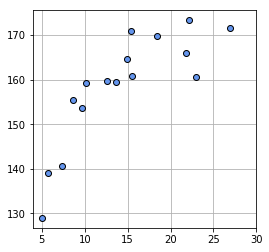

In [6]:
# 리스트 5-1-(5)
# 데이터 그래프 ------------------------------
plt.figure(figsize=(4, 4))
plt.plot(X, T, marker='o', linestyle='None',
         markeredgecolor='black', color='cornflowerblue')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()
# 그래프를 그려보니 이렇더라 ~ 

### 5.1.1 직선 모델 (linear regression)

training data를 가장 잘 표현할 수 있는 직선은?
![대체 텍스트](그림5-2.JPG)

직선의 방정식은?
![대체 텍스트](식5-2.JPG)
$x$는 나이를 나타내고, $y(x)$는 $x$에 대한 $t$의 예측치를 표현한다.

직선이 training data에 가장 잘 부합할려면 $w_0$와 $w_1$을 어떻게 정할까?

### 5.1.2 제곱 오차 함수

![대체 텍스트](그림5-3.JPG)

직선과 각 데이터 점들 사이의 오차 (MSE)가 가장 작을 수 있게 직선을 고른다.

일단 $\textbf{w}$와 $J$의 관계를 그래프로 표현해 보자.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1558: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1239: RuntimeWarning: invalid value encountered in greater
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1239: RuntimeWarning: invalid value encountered in less
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
 

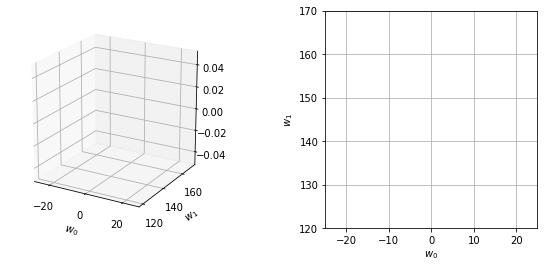

In [7]:
# 리스트 5-1-(6)
from mpl_toolkits.mplot3d import Axes3D
# 평균 오차 함수 ------------------------------
def mse_line(x, t, w):
    y = None            # 여기에 None 대신에 적절한 코드를 입력하시오.
    mse = None          # 여기에 None 대신에 적절한 코드를 입력하시오.
    return mse

# 계산 --------------------------------------
wn = 100 # 등고선 표시 해상도
w0_range = [-25, 25]
w1_range = [120, 170]
w0 = np.linspace(w0_range[0], w0_range[1], wn)
w1 = np.linspace(w1_range[0], w1_range[1], wn)
ww0, ww1 = np.meshgrid(w0, w1)      
J = np.zeros((len(w0), len(w1)))    
for i1 in range(wn):            # 중첩 for 문에서 i0,i1의 순서는 상관 없음
    for i0 in range(wn):
        J[i1, i0] = None        # 여기에 None 대신에 적절한 코드를 입력하시오.

# 표시 --------------------------------------
plt.figure(figsize=(9.5, 4))
plt.subplots_adjust(wspace=0.5)

ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(ww0, ww1, J, rstride=10, cstride=10, alpha=0.3,
                color='blue', edgecolor='black')
ax.set_xticks([-20, 0, 20])
ax.set_yticks([120, 140, 160])
ax.set_xlabel('$w_0$')
ax.set_ylabel('$w_1$')
ax.view_init(20, -60)

plt.subplot(1, 2, 2)
cont = plt.contour(ww0, ww1, J, 30, colors='black',
                   levels=[100, 1000, 10000, 100000])
cont.clabel(fmt='%1.0f', fontsize=8)
plt.xlabel('$w_0$')
plt.ylabel('$w_1$')
plt.grid(True)
plt.show()


위의 그래프에서 $w_0=3,w_1=135$ 근처에서 $J$가 최소값을 가짐

### 5.1.3 매개변수 구하기 (gradient descent)

- 초기 위치로 적당한 $w_0$와 $w_1$을 결정 
- 이 점에서의 기울기를 확인하고 $J$가 감소하는 방향으로 $w_0$와 $w_1$을 조금만 진행
- 위의 과정을 여러 번 반복하여 최종적으로 $J$가 가장 작아지는 $w_0$와 $w_1$을 수정
![그림5-5 기울기(gradient)](그림5-5.JPG)

기울기(gradient) of $J$  
- $\nabla_W J = \left[ \frac{\partial J}{\partial w_0}, \frac{\partial J}{\partial w_1} \right]^T$

$J$를 최소화하려면 $J$의 기울기의 반대방향 $-\nabla_W J = -\left[ \frac{\partial J}{\partial w_0}, \frac{\partial J}{\partial w_1} \right]^T$으로 진행

$\textbf{w}$의 갱신방법(학습법칙)을 행렬표기로 나타내면 
![대체 텍스트](식5-5.JPG)
where $\alpha$ = 학습율(learning rate)

위의 수식을 각 성분별로 나타내면
![대체 텍스트](식5-7.JPG)

Gradient를 구하기 위하여 $J$를 편미분 하면
![대체 텍스트](식5-8.JPG)
![대체 텍스트](식5-9.JPG)
![대체 텍스트](식5-10.JPG)

따라서 (식5-6),(식5-7)의 학습법칙은 아래와 같이 다시 쓸 수 있다.
![대체 텍스트](식5-11.JPG)

아래는 (식5-9),(식5-10)에 대한 프로그램이다.

In [8]:
# 리스트 5-1-(7)
# 평균 제곱 오차의 기울기 ------------------------
def dmse_line(x, t, w):
    y = w[0] * x + w[1]
    d_w0 = None            # 여기에 None 대신에 적절한 코드를 입력하시오.
    d_w1 = None            # 여기에 None 대신에 적절한 코드를 입력하시오.
    return d_w0, d_w1


초기값 $\textbf{w = [10, 165]}$에서의 기울기

In [9]:
# 리스트 5-1-(8)
d_w = dmse_line(X, T, [10, 165])
print(np.round(d_w, 1))


TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'

경사하강법(gradient descent) 구현

In [ ]:
# 리스트 5-1-(9)
# 경사하강법 ------------------------------------
def fit_line_num(x, t):
    w_init = [10.0, 165.0] # 초기 매개 변수
    alpha = 0.001 # 학습률
    i_max = 100000 # 반복의 최대 수
    eps = 0.1 # 반복을 종료 기울기의 절대 값의 한계
    w_i = np.zeros([i_max, 2])    # iteration 별 w=[w0,w1] 값의 변경 내역
    w_i[0, :] = w_init
    for i in range(1, i_max):
        mse = mse_line(x, t, w_i[i - 1])
        if i % 1000 == 0:
            print("Iter =", i, ",    MSE = ", mse)
        dmse = dmse_line(x, t, w_i[i - 1])
        w_i[i, 0] = None        # 여기에 None 대신에 적절한 코드를 입력하시오.
        w_i[i, 1] = None        # 여기에 None 대신에 적절한 코드를 입력하시오.
        if max(np.absolute(dmse)) < eps: # 종료판정, np.absolute는 절대치
            break
    w0 = w_i[i, 0]
    w1 = w_i[i, 1]
    w_i = w_i[:i, :]
    return w0, w1, dmse, w_i


# 메인 ------------------------------------
plt.figure(figsize=(4, 4)) # MSE의 등고선 표시
wn = 100 # 등고선 해상도
w0_range = [-25, 25]
w1_range = [120, 170]
w0 = np.linspace(w0_range[0], w0_range[1], wn)
w1 = np.linspace(w1_range[0], w1_range[1], wn)
ww0, ww1 = np.meshgrid(w0, w1)
J = np.zeros((len(w0), len(w1)))
for i1 in range(wn):        # 중첩 for 문에서 i0,i1의 순서는 상관 없음
    for i0 in range(wn):
        J[i1, i0] = mse_line(X, T, (w0[i0], w1[i1]))
cont = plt.contour(ww0, ww1, J, 30, colors='black',
                   levels=(100, 1000, 10000, 100000))
cont.clabel(fmt='%1.0f', fontsize=8) 
plt.xlabel('$w_0$')
plt.ylabel('$w_1$')
plt.grid(True)

# 경사하강법 호출
W0, W1, dMSE, W_history = fit_line_num(X, T)

# 결과보기
print('반복 횟수 {0}'.format(W_history.shape[0]))
print('W=[{0:.6f}, {1:.6f}]'.format(W0, W1))
print('dMSE=[{0:.6f}, {1:.6f}]'.format(dMSE[0], dMSE[1]))
print('MSE={0:.6f}'.format(mse_line(X, T, [W0, W1])))
plt.plot(W_history[:, 0], W_history[:, 1], '.-',
         color='gray', markersize=10, markeredgecolor='cornflowerblue')
plt.show()


위의 경사하강법으로 구한 $\textbf{w0}$와 $\textbf{w1}$으로 직선(regression line)을 그려보면

In [ ]:
# 리스트 5-1-(10)
# 선 표시 ----------------------------------
def show_line(w):
    xb = np.linspace(X_min, X_max, 100)
    y = w[0] * xb + w[1]
    plt.plot(xb, y, color=(.5, .5, .5), linewidth=4)


# 메인 ------------------------------------
plt.figure(figsize=(4, 4))
W=np.array([W0, W1])
mse = mse_line(X, T, W)
print("w0={0:.3f}, w1={1:.3f}".format(W0, W1))
print("MSE={0:.3f} cm".format(mse))
print("SD={0:.3f} cm".format(np.sqrt(mse)))
show_line(W) 
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue', markeredgecolor='black') 
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()


### 5.1.4 선형 모델 매개변수의 해석해

직선모델(linear regression)의 매개변수 $\textbf{w}$ 구하기
- 수치해 : 경사하강법(gradient descent method)을 이용한 근사값 
- 해석해 : 방정식을 이용한 정확한 값

목표 : $J$가 극소화되는 $\textbf{w}$ 찾기
- 즉, (식5-9),(식5-10)에서 기울기가 0이되는 $\textbf{w}$
![대체 텍스트](식5-13.JPG)

우선 (식5-13)을 먼저 계산하기 위하여, 양변을 2로 나누면
![대체 텍스트](식5-15.JPG)
$\sum$을 각 항에 전개하면
![대체 텍스트](식5-16.JPG)
![대체 텍스트](식5-17.JPG)
평균 기호를 < > 로 표현하면
![대체 텍스트](식5-17-1.JPG)
위의 수식을 < > 를 이용하여 간략하게 표시하면
![대체 텍스트](식5-18.JPG)
같은 방법으로 (식5-14)를 정리하면
![대체 텍스트](식5-19.JPG)
(식5-18),(식5-19)를 연립방정식으로 $w_0$와 $w_1$을 구하면
![대체 텍스트](식5-19-1.JPG)
![대체 텍스트](식5-20.JPG)
![대체 텍스트](식5-21.JPG)

해석해 구하는 프로그램 

In [ ]:
# 리스트 5-1-(11)
# 해석해 ------------------------------------
def fit_line(x, t):
    mx = np.mean(x)
    mt = np.mean(t)
    mtx = np.mean(t * x)
    mxx = np.mean(x * x)
    w0 = None        # 여기에 None 대신에 적절한 코드를 입력하시오.
    w1 = None        # 여기에 None 대신에 적절한 코드를 입력하시오.
    return np.array([w0, w1])

# 메인 ------------------------------------
W = fit_line(X, T)
print("w0={0:.3f}, w1={1:.3f}".format(W[0], W[1]))
mse = mse_line(X, T, W)
print("SD={0:.3f} cm".format(np.sqrt(mse)))
plt.figure(figsize=(4, 4))
show_line(W)
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()


빠르다!!! 그러나 비선형 모델 같은 경우는 해석해를 못 구하는 경우가 많음!

## 5.2 2차원 입력면 모델 

입력 데이터 : 2차원 $\textbf{x} = (x_0,x_1)$
- 예, 데이터 = (나이, 몸무게)

테스트를 위해 몸무게($x_1$)를 아래와 같이 임의로 생성
![대체 텍스트](식5-22.JPG)

In [ ]:
# 리스트 5-1-(12)
# 2차원 데이터 생성 --------------------------
X0 = X    # X0 = 나이
X0_min = 5
X0_max = 30
np.random.seed(seed=1) # 난수를 고정
X1 = 23 * (T / 100)**2 + 2 * np.random.randn(X_n)    # X1 = 몸무게
X1_min = 40
X1_max = 75

In [ ]:
# 리스트 5-1-(13)
print(np.round(X0, 2))
print(np.round(X1, 2))
print(np.round(T, 2))


In [ ]:
# 리스트 5-1-(14)
# 2차원 데이터의 표시 ------------------------
def show_data2(ax, x0, x1, t):
    for i in range(len(x0)):
        ax.plot([x0[i], x0[i]], [x1[i], x1[i]],
                [120, t[i]], color='gray')
        ax.plot(x0, x1, t, 'o',
                color='cornflowerblue', markeredgecolor='black',
                markersize=6, markeredgewidth=0.5)
        ax.view_init(elev=35, azim=-75)


# 메인 ------------------------------------
plt.figure(figsize=(6, 5))
ax = plt.subplot(1,1,1,projection='3d')
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_1$')
show_data2(ax, X0, X1, T)
plt.show()


### 5.2.1 데이터의 표시방법

입력 데이터 : 2차원 $\textbf{x} = (x_0,x_1)$
- 예, 데이터 = (나이, 몸무게)

데이터 표기 방법: $x_{n,m}$ 또는 $x_{nm}$ (n 번째 데이터의 m 번째 특징)
- $n$ : 데이터 번호
- $m$ : 벡터의 요소 (0=나이, 1=몸무게 등) 번호

(나이,몸무게) 데이터에 대한 입력 데이터와 목표(target) 데이터를 행렬로 표현하면:

$\qquad \textbf{x} = \begin{bmatrix} x_{00} & x_{01} \\ x_{10} & x_{11} \\ \vdots & \vdots \\ x_{N-1,0} & x_{N-1,1} \end{bmatrix}, \qquad   \textbf{t} = \begin{bmatrix} t_{0} \\ t_{1} \\ \vdots \\ t_{N-1} \end{bmatrix}$ 

### 5.2.2 면 모델 

(나이,몸무게) 데이터에 대해서는 직선 모델이 아닌 면(plane) 모델이 되므로 회귀식은 아래와 같이 나타낼 수 있다:

$\qquad y(x_0,x_1) = w_0x_0 + w_1x_1 + w_2$

행렬식으로 나타내면:

$\qquad \textbf{y} = \textbf{w}^T\textbf{x}
\qquad \text{where} \qquad \textbf{x} = \begin{bmatrix} x_{0} \\ x_{1} \\ 1 \end{bmatrix}, 
\qquad \textbf{w} = \begin{bmatrix} w_{0} \\ w_{1} \\ w_{2} \end{bmatrix}$ 

임의의 $\textbf{w}=[1.5,1,90]$에 대해 면을 한번 그려 보자.

In [ ]:
# 리스트 5-1-(15)
#면의 표시 ----------------------------------
def show_plane(ax, w):
    px0 = np.linspace(X0_min, X0_max, 5)
    px1 = np.linspace(X1_min, X1_max, 5)
    px0, px1 = np.meshgrid(px0, px1)
    y = None        # 여기에 None 대신에 적절한 코드를 입력하시오.
    ax.plot_surface(px0, px1, y, rstride=1, cstride=1, alpha=0.3,
                    color='blue', edgecolor='black') 

#면의 MSE -----------------------------------
def mse_plane(x0, x1, t, w):
    y = None         # 여기에 None 대신에 적절한 코드를 입력하시오.
    mse = None       # 여기에 None 대신에 적절한 코드를 입력하시오.
    return mse

# 메인 ------------------------------------
plt.figure(figsize=(6, 5))
ax = plt.subplot(1, 1, 1, projection='3d')
W = [1.5, 1, 90]    # 임의의 W
show_plane(ax, W) 
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_1$')
show_data2(ax, X0, X1, T)
mse = mse_plane(X0, X1, T, W)
print("SD={0:.3f} cm".format(np.sqrt(mse)))
plt.show()


위의 그래프에서 면(plane)의 함수는
![대체 텍스트](식5-28.JPG)

**면모델에 대한 평균 제곱 오차 (Mean Square Error, MSE)**:
![대체 텍스트](식5-3.JPG)
$\qquad \qquad \qquad \qquad \qquad \qquad$ where
$\qquad y_n = y(x_{n0},x_{n1}) = w_0x_{n0} + w_1x_{n1} + w_2$

**면모델에 대해 매개변수 구하기 (경사하강법)**

기울기(gradient) of $J$  

$\qquad \nabla_W J = \left[ \frac{\partial J}{\partial w_0}, \frac{\partial J}{\partial w_1}, \frac{\partial J}{\partial w_2} \right]^T$


$\textbf{w}$의 갱신방법(학습법칙)을 행렬표기로 나타내면 
![대체 텍스트](식5-5.JPG)
$\qquad$ where $\alpha$ = 학습율(learning rate)


Gradient를 구하기 위하여 $J$를 편미분 하여 다시 쓰면:

$\qquad w_0(t+1) = w_0(t) - \alpha\frac{2}{N}\sum\limits_{n=0}^{N-1}{(y_n-t_n)x_{n0}}$

$\qquad w_1(t+1) = w_1(t) - \alpha\frac{2}{N}\sum\limits_{n=0}^{N-1}{(y_n-t_n)x_{n1}}$

$\qquad w_2(t+1) = w_2(t) - \alpha\frac{2}{N}\sum\limits_{n=0}^{N-1}{(y_n-t_n)}$

**실습문제**: 위의 2차원 입력데이터와 면(plane) 모델에 대해 평균제곱오차(mean square error) 함수와 경사하강법(gradient descent)을 이용해 최적의 면(plane) 함수를 구하시오.

In [ ]:
#면의 MSE -----------------------------------
def mse_plane(x0, x1, t, w):
    pass                 # 여기에 pass 대신에 적절한 코드를 입력하시오. 여러 라인이 될 수 있습니다.
    return mse

# 면의 평균 제곱 오차의 기울기 ------------------------
def dmse_plane(x0, x1, t, w):
    pass                 # 여기에 pass 대신에 적절한 코드를 입력하시오. 여러 라인이 될 수 있습니다.
    return d_w0, d_w1, d_w2


In [ ]:
print(mse_plane(X0, X1, T, [1, 1, 1]))  
print(mse_plane(X0, X1, T, [1, 2, 3]))    
print(mse_plane(X0, X1, T, [1, 2, 10]))    
print(mse_plane(X0, X1, T, [1.5, 1, 90]))
d_w = dmse_plane(X0, X1, T, [1.5, 1, 90])
print(np.round(d_w, 1))

In [ ]:
# 면의 경사하강법 ------------------------------------
def fit_plane_num(x0, x1, t):
    pass                 # 여기에 pass 대신에 적절한 코드를 입력하시오. 여러 라인이 될 수 있습니다.
    return w0, w1, w2, dmse, w_i

In [ ]:
# 메인 ------------------------------------

# 경사하강법 호출
W0, W1, W2, dMSE, W_history = fit_plane_num(X0, X1, T)

# 결과보기
print('반복 횟수 {0}'.format(W_history.shape[0]))
print('W=[{0:.6f}, {1:.6f}, {2:.6f}]'.format(W0, W1, W2))
print('dMSE=[{0:.6f}, {1:.6f}, {2:.6f}]'.format(dMSE[0], dMSE[1], dMSE[2]))
print('MSE={0:.6f}'.format(mse_plane(X0, X1, T, [W0, W1, W2])))


In [ ]:
# 경사하강법으로 구한 W0, W1, W2를 이용해 면(plane)을 다시 그리기
plt.figure(figsize=(12, 5))
ax = plt.subplot(1, 2, 1, projection='3d')
W = [1.5, 1, 90]    # 임의의 W
plt.title("W = [1.5, 1, 90]")
show_plane(ax, W) 
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_1$')
show_data2(ax, X0, X1, T)
mse = mse_plane(X0, X1, T, W)
print("임의의 W에 대한 SD={0:.3f} cm".format(np.sqrt(mse)))

ax = plt.subplot(1, 2, 2, projection='3d')
W = [W0, W1, W2]    # 경사하강법으로 구한 W
plt.title("W by GD")
show_plane(ax, W) 
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_1$')
show_data2(ax, X0, X1, T)

mse = mse_plane(X0, X1, T, W)
print("경사하강법에 의한 SD={0:.3f} cm".format(np.sqrt(mse)))

plt.show()


### 5.2.3 매개변수의 해석해 (생략)

## 5.3 D차원 선형 회귀 모델

$x_n$이 $M$ 차원이면
![대체 텍스트](식5-24.JPG)
모든 데이터에 대해서는
![대체 텍스트](식5-25.JPG)
차원 $m$에 대해서만 정렬
![대체 텍스트](식5-26.JPG)
Target vector는
![대체 텍스트](식5-27.JPG)

### 5.3.1 D차원 선형 회귀 모델

![대체 텍스트](식5-37.JPG)

모델을 쉽게 하기 위해 절편 $w_D$를 생략하면 
![대체 텍스트](식5-38.JPG)
위와 같이 항상 원점 $\textbf{x}=[0,0,...,0]$을 지나는 hyperplane이 됨

행렬 표기법을 사용하여 짧게 정리하면
![대체 텍스트](식5-39.JPG)

원점을 지나지 않는 hyperplane은 항상 $x_D=1$을 추가해서 $\textbf{x}$를 $D+1$차원으로 확장하면

$y(x) = w_0x_0+\cdots+w_{D-1}x_{D-1}+w_Dx_D = [w_0 \cdots w_D] \begin{bmatrix} x_{0} \\ \vdots \\ x_{D} \end{bmatrix} = \textbf{w}^T\textbf{x}$

### 5.3.2 매개 변수의 해석해 (이후 모두 생략)